In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt



In [12]:
class PYT(nn.Module):
    def __init__(self):
        super(PYT, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 50), 
            (nn.Tanh()), 
            (nn.Linear(50, 1))
        )

    def forward(self, x):
        return self.model(x)

In [13]:
model = PYT()
print(model)

PYT(
  (model): Sequential(
    (0): Linear(in_features=1, out_features=50, bias=True)
    (1): Tanh()
    (2): Linear(in_features=50, out_features=1, bias=True)
  )
)


Epoch [100/500], Loss: 0.0362
Epoch [200/500], Loss: 0.0341
Epoch [300/500], Loss: 0.0325
Epoch [400/500], Loss: 0.0311
Epoch [500/500], Loss: 0.0298
Treinamento concluído!


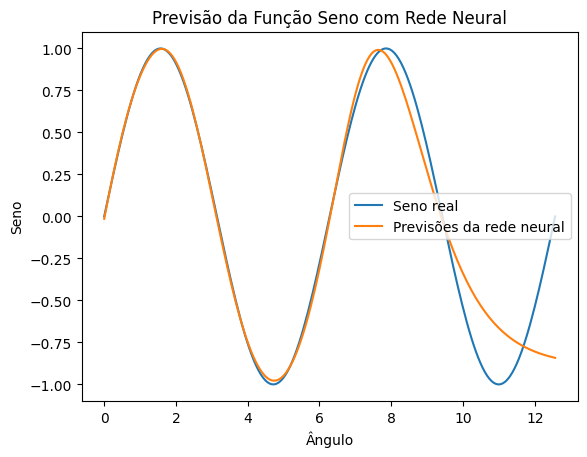

In [ ]:
# 3. Gerar dados de treinamento
num_samples = 1000
x_train = np.linspace(0, 4*np.pi, num_samples).reshape(-1, 1).astype(np.float32)
y_train = np.sin(x_train).reshape(-1, 1).astype(np.float32)

# Converter para tensores PyTorch; Precisamos converter pois os modulos so operam com objetos do tipo torch.tensor
x_train_tensor = torch.from_numpy(x_train)
y_train_tensor = torch.from_numpy(y_train)

# 4. Definir a função de perda
criterion = nn.MSELoss()

# 5. Definir o otimizador
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 6. Implementar o loop de treinamento
num_epochs = 500

for epoch in range(num_epochs):
    # Forward pass: calcula as saídas do modelo para as entradas de treinamento
    outputs = model(x_train_tensor)

    # Calcula a perda comparando as saídas com os valores reais
    loss = criterion(outputs, y_train_tensor)

    # Backward pass e otimização
    optimizer.zero_grad()  # Zera os gradientes da iteração anterior
    loss.backward()      # Calcula os gradientes da perda em relação aos parâmetros
    optimizer.step()     # Atualiza os parâmetros com base nos gradientes

    # Imprime a perda a cada 100 épocas para acompanhar o treinamento
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Treinamento concluído!")

# Opcional: Testar o modelo treinado
model.eval()  # Coloca o modelo em modo de avaliação (desativa dropout, batch norm, etc.)
x_test = np.linspace(0, 4 * np.pi, 200).reshape(-1, 1).astype(np.float32)
x_test_tensor = torch.from_numpy(x_test)
with torch.no_grad():  # Desativa o cálculo de gradientes para a inferência
    predictions = model(x_test_tensor)
    y_test = np.sin(x_test)

plt.plot(x_test, y_test, label='Seno real')
plt.plot(x_test, predictions.numpy(), label='Previsões da rede neural')
plt.xlabel('Ângulo')
plt.ylabel('Seno')
plt.legend()
plt.title('Previsão da Função Seno com Rede Neural')
plt.show()

In [17]:
x_train_tensor

tensor([[-3.1416],
        [-3.1353],
        [-3.1290],
        [-3.1227],
        [-3.1164],
        [-3.1101],
        [-3.1039],
        [-3.0976],
        [-3.0913],
        [-3.0850],
        [-3.0787],
        [-3.0724],
        [-3.0661],
        [-3.0598],
        [-3.0535],
        [-3.0473],
        [-3.0410],
        [-3.0347],
        [-3.0284],
        [-3.0221],
        [-3.0158],
        [-3.0095],
        [-3.0032],
        [-2.9969],
        [-2.9906],
        [-2.9844],
        [-2.9781],
        [-2.9718],
        [-2.9655],
        [-2.9592],
        [-2.9529],
        [-2.9466],
        [-2.9403],
        [-2.9340],
        [-2.9278],
        [-2.9215],
        [-2.9152],
        [-2.9089],
        [-2.9026],
        [-2.8963],
        [-2.8900],
        [-2.8837],
        [-2.8774],
        [-2.8711],
        [-2.8649],
        [-2.8586],
        [-2.8523],
        [-2.8460],
        [-2.8397],
        [-2.8334],
        [-2.8271],
        [-2.8208],
        [-2.

In [18]:
x_train

array([[-3.1415927 ],
       [-3.1353033 ],
       [-3.1290138 ],
       [-3.1227243 ],
       [-3.1164348 ],
       [-3.1101453 ],
       [-3.1038558 ],
       [-3.0975664 ],
       [-3.091277  ],
       [-3.0849874 ],
       [-3.078698  ],
       [-3.0724084 ],
       [-3.066119  ],
       [-3.0598295 ],
       [-3.05354   ],
       [-3.0472505 ],
       [-3.040961  ],
       [-3.0346715 ],
       [-3.028382  ],
       [-3.0220926 ],
       [-3.015803  ],
       [-3.0095136 ],
       [-3.0032241 ],
       [-2.9969347 ],
       [-2.9906452 ],
       [-2.9843557 ],
       [-2.9780662 ],
       [-2.9717767 ],
       [-2.9654872 ],
       [-2.959198  ],
       [-2.9529085 ],
       [-2.946619  ],
       [-2.9403296 ],
       [-2.93404   ],
       [-2.9277506 ],
       [-2.921461  ],
       [-2.9151716 ],
       [-2.9088821 ],
       [-2.9025927 ],
       [-2.8963032 ],
       [-2.8900137 ],
       [-2.8837242 ],
       [-2.8774347 ],
       [-2.8711452 ],
       [-2.8648558 ],
       [-2